In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
#Load data file
file_to_load = "Data/chicago_data.csv"
chicago_data_df = pd.read_csv(file_to_load)
chicago_data_df.count()

date                                      236
cases_total                               237
deaths_total                              237
hospitalizations_total                    233
cases_age_0_17                            237
                                         ... 
combined_hospital_beds_in_use_covid_19    204
daily_update_pdf                          218
ventilator_surge_capacity                  54
icu_beds_surge_capacity_adult              54
icu_beds_surge_capacity_pediatric          54
Length: 90, dtype: int64

In [3]:
#Get rid of unknowns
chicago_data_df = chicago_data_df.drop(columns=['cases_age_unknown','cases_unknown_gender','hospitalizations_unknown_gender',\
                                          'hospitalizations_age_unknown','hospitalizations_age_unknown',\
                                          'cases_unknown_race_eth','hospitalizations_unknown_race_ethnicity',\
                                          'deaths_unknown_gender','hospitalizations_unknown_race_ethnicity',\
                                          'cases_unknown_race_eth','deaths_unknown_gender','deaths_unknown_age',\
                                          'deaths_unknown_age','cases_unknown_race_eth','deaths_unknown_race_eth'])

In [4]:
#Convert date column from a string to a datetime datatype
chicago_data_df["date"] = pd.to_datetime(chicago_data_df["date"])

#Use the date column as the index
chicago_data_df = chicago_data_df.set_index("date")
chicago_data_df

,cases_total,deaths_total,hospitalizations_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,cases_age_70_79,...,acute_non_icu_beds_in_use_covid_19,acute_non_icu_beds_in_use_covid_19_patients,acute_non_icu_beds_in_use_covid_19_pui,acute_non_icu_beds_in_use_non_covid_19,acute_non_icu_beds_available_total,combined_hospital_beds_in_use_covid_19,daily_update_pdf,ventilator_surge_capacity,icu_beds_surge_capacity_adult,icu_beds_surge_capacity_pediatric
date,,,,,,,,,,,,,,,,,,,,,
2020-03-29,282,20,130.0,4,29,48,54,50,50,30,...,NaN,NaN,NaN,NaN,1638.0,NaN,{'url': 'https://www.chicago.gov/content/dam/c...,196.0,218.0,8.0
2020-03-01,0,0,2.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02,0,0,2.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,0,0,3.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,0,0,4.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-04,319,14,35.0,27,92,63,54,40,25,10,...,721.0,437.0,284.0,4593.0,2450.0,1033.0,{'url': 'https://www.chicago.gov/content/dam/c...,NaN,NaN,NaN
2020-07-15,267,7,24.0,30,83,51,33,34,18,12,...,423.0,184.0,239.0,5193.0,2421.0,521.0,{'url': 'https://www.chicago.gov/content/dam/c...,NaN,NaN,NaN
2020-07-13,335,3,35.0,36,98,68,45,35,31,7,...,361.0,161.0,200.0,5090.0,2592.0,467.0,{'url': 'https://www.chicago.gov/content/dam/c...,NaN,NaN,NaN


In [5]:
#gather data of number of deaths by gender
deaths_by_gender = ([chicago_data_df["deaths_male"].sum(), chicago_data_df["deaths_female"].sum()])
          
x_axis = np.arange(len(deaths_by_gender))

(0.0, 2276.0)

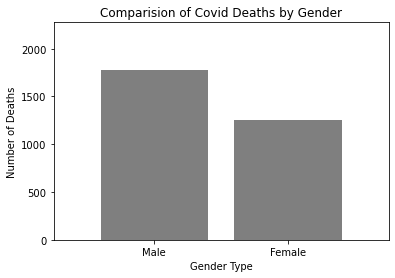

In [6]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
xlabels = ["Male", "Female"]
plt.bar(xlabels, deaths_by_gender, color= 'black', alpha=0.5, align="center")

# Give our chart some labels and a tile
plt.title("Comparision of Covid Deaths by Gender")
plt.xlabel("Gender Type")
plt.ylabel("Number of Deaths")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(deaths_by_gender)+500)


In [7]:
# Generate a pie plot showing the distribution of Covid deaths by gender
deaths_df = pd.DataFrame({
    "Gender": ["Male", "Female"],
    "Deaths": [chicago_data_df["deaths_male"].sum(), chicago_data_df["deaths_female"].sum()]             
})

deaths_df = deaths_df[deaths_df.Deaths != 0]
# change the index to values in Gender column, the DF index will be used for the X label
deaths_df = deaths_df.set_index("Gender") 

Text(0, 0.5, '')

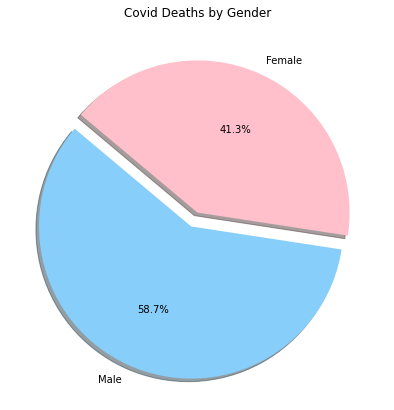

In [8]:
# Generate a pie plot showing the distribution of Covid deaths by gender
plt.figure(figsize=(15,15))
ax = plt.subplot(121, aspect="equal")

explode = [0.1, 0] # for plotting two data points

# The colors of each section of the pie chart
colors = ["lightskyblue", "pink"]
deaths_df.plot(kind="pie", y = "Deaths", title="Covid Deaths by Gender", ax=ax,\
            autopct='%1.1f%%', legend = False, fontsize=10, colors=colors,\
            startangle=140, shadow = True, explode = explode)
#null out the y label
plt.ylabel("")

In [9]:
#gather data of number of deaths by race
deaths_by_race = ([chicago_data_df["deaths_black_non_latinx"].sum(), chicago_data_df["deaths_latinx"].sum(),\
                   chicago_data_df["deaths_white_non_latinx"].sum(), chicago_data_df["deaths_asian_non_latinx"].sum(),\
                   chicago_data_df["deaths_other_non_latinx"].sum()])

print(deaths_by_race)
x_axis = np.arange(len(deaths_by_race))

[1279, 999, 585, 128, 24]


(0.0, 1479.0)

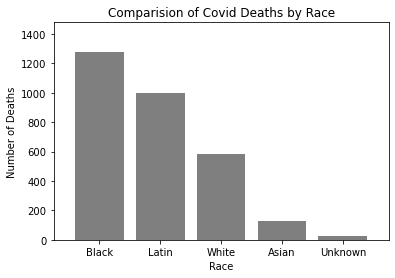

In [10]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
xlabels = ["Black", "Latin", "White", "Asian", "Unknown"]
plt.bar(xlabels, deaths_by_race, color='black', alpha=0.5, align="center")
# Give our chart some labels and a tile
plt.title("Comparision of Covid Deaths by Race")
plt.xlabel("Race")
plt.ylabel("Number of Deaths")
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(deaths_by_race)+200)
#plt.grid()

In [11]:
deaths_by_race_df = pd.DataFrame({
    "Race": ["Black", "White", "Latin", "Asian", "Unknown"],
    "Deaths": [chicago_data_df["deaths_black_non_latinx"].sum(), chicago_data_df["deaths_white_non_latinx"].sum(),\
              chicago_data_df["deaths_latinx"].sum(), chicago_data_df["deaths_asian_non_latinx"].sum(),\
               chicago_data_df["deaths_other_non_latinx"].sum()]
})

deaths_by_race_df.sort_values(by=["Deaths"], inplace=True, ascending=False)
# change the index to values in Race column, the DF index will be used for the X label
deaths_by_race_df = deaths_by_race_df.set_index("Race")
deaths_by_race_df

,Deaths
Race,
Black,1279
Latin,999
White,585
Asian,128
Unknown,24


Text(0, 0.5, 'Number of Deaths')

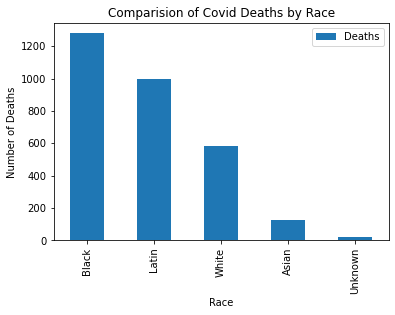

In [12]:
# Generate a bar plot showing the distribution of Covid deaths by gender
deaths_by_race_df.plot(kind="bar") 

plt.title("Comparision of Covid Deaths by Race")
plt.xlabel("Race")
plt.ylabel("Number of Deaths")

In [13]:
#Comparison of deaths by age group
deaths_by_age_df = pd.DataFrame({
    "Age Group": ["0_17_yrs", "18_29_yrs", "30_39_yrs", "40_49_yrs", "50_59_yrs", "60_69_yrs", "70_79_yrs", "80_yrs"],
    "Deaths": [chicago_data_df["deaths_0_17_yrs"].sum(), chicago_data_df["deaths_18_29_yrs"].sum(),\
        chicago_data_df["deaths_30_39_yrs"].sum(), chicago_data_df["deaths_40_49_yrs"].sum(),\
        chicago_data_df["deaths_50_59_yrs"].sum(), chicago_data_df["deaths_60_69_yrs"].sum(),\
        chicago_data_df["deaths_70_79_yrs"].sum(), chicago_data_df["deaths_80_yrs"].sum()]
})
deaths_by_age_df = deaths_by_age_df.set_index("Age Group")

deaths_by_age_df

,Deaths
Age Group,
0_17_yrs,2
18_29_yrs,23
30_39_yrs,76
40_49_yrs,170
50_59_yrs,340
60_69_yrs,661
70_79_yrs,749
80_yrs,1005


Text(0, 0.5, 'Number of Deaths')

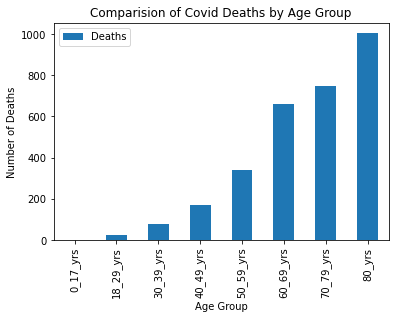

In [14]:
# Generate a bar plot showing the distribution of Covid deaths by age group
deaths_by_age_df.plot(kind="bar") 

plt.title("Comparision of Covid Deaths by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths")

In [15]:
#create hospitalization df
hospitalizations_by_age_df = pd.DataFrame({
    "Age Group": ["0_17_yrs", "18_29_yrs", "30_39_yrs", "40_49_yrs", "50_59_yrs", "60_69_yrs", "70_79_yrs", "80_yrs"],
    "Hospitalizations": [chicago_data_df["hospitalizations_age_0_17"].sum(), chicago_data_df["hospitalizations_age_18_29"].sum(),\
        chicago_data_df["hospitalizations_age_30_39"].sum(), chicago_data_df["hospitalizations_age_40_49"].sum(),\
        chicago_data_df["hospitalizations_age_50_59"].sum(), chicago_data_df["hospitalizations_age_60_69"].sum(),\
        chicago_data_df["hospitalizations_age_70_79"].sum(), chicago_data_df["hospitalizations_age_80_"].sum()]
})
hospitalizations_by_age_df = hospitalizations_by_age_df.set_index("Age Group")

In [16]:
#Create a DF that is composed of deaths and hospitalizations by age group
deaths_vs_hospital_df = pd.concat([deaths_by_age_df, hospitalizations_by_age_df], axis=1)

deaths_vs_hospital_df

,Deaths,Hospitalizations
Age Group,,
0_17_yrs,2,217.0
18_29_yrs,23,992.0
30_39_yrs,76,1229.0
40_49_yrs,170,1759.0
50_59_yrs,340,2521.0
60_69_yrs,661,2798.0
70_79_yrs,749,2291.0
80_yrs,1005,1856.0


Text(0, 0.5, 'Number of Deaths')

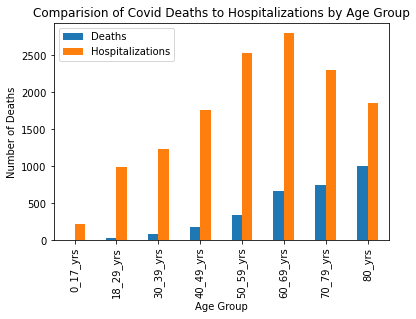

In [17]:
#plot bar that shows comparision of deaths to hospitalizations by age group
#plt.style.use('seaborn-colorblind')
deaths_vs_hospital_df.plot(kind="bar") 

plt.title("Comparision of Covid Deaths to Hospitalizations by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths")

In [18]:
hospitalizations_by_age_df = pd.DataFrame({
    "Age Group": ["0_17_yrs", "18_29_yrs", "30_39_yrs", "40_49_yrs", "50_59_yrs", "60_69_yrs", "70_79_yrs", "80_yrs"],
    "Hospitalizations": [chicago_data_df["hospitalizations_age_0_17"].sum(), chicago_data_df["hospitalizations_age_18_29"].sum(),\
        chicago_data_df["hospitalizations_age_30_39"].sum(), chicago_data_df["hospitalizations_age_40_49"].sum(),\
        chicago_data_df["hospitalizations_age_50_59"].sum(), chicago_data_df["hospitalizations_age_60_69"].sum(),\
        chicago_data_df["hospitalizations_age_70_79"].sum(), chicago_data_df["hospitalizations_age_80_"].sum()]
})

In [19]:
#Group the data by month or week ('W' or 'M') and take the sum for each group (i.e. each month)
cases_df = chicago_data_df.resample("W").sum()

In [20]:
monthly_cases_df = cases_df[['cases_total']]

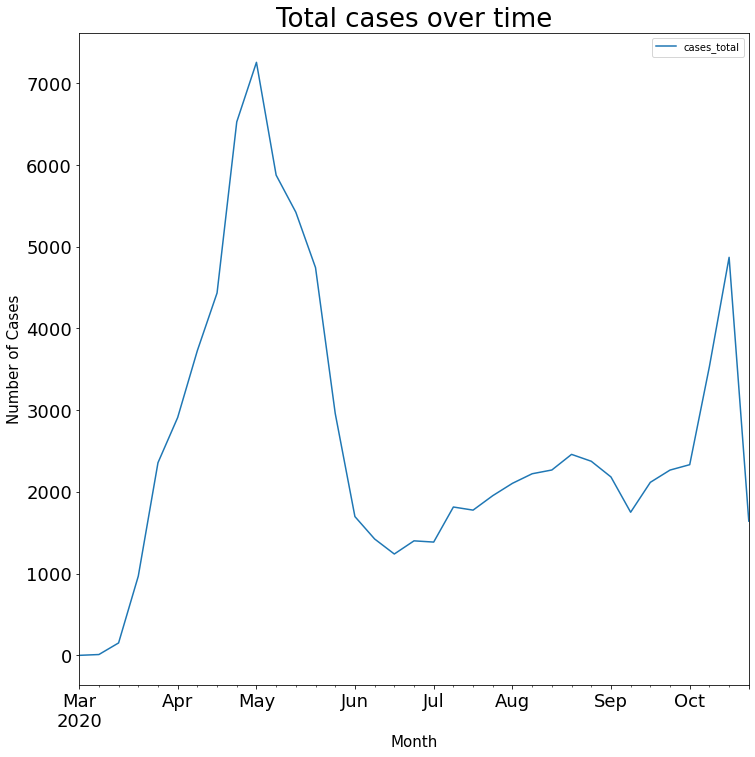

<Figure size 432x288 with 0 Axes>

In [24]:
#plot cases over time
monthly_cases_df.plot(kind="line", figsize=(12,12), fontsize=(18))
plt.title("Total cases over time", fontsize=26)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Cases", fontsize=15)
fig = plt.figure()
plt.savefig('Total Cases.png') # this doesn't work, why?

What is the trend of "cases" by month?

In [25]:
all_age_groups_df = cases_df[["cases_age_0_17", "cases_age_18_29", "cases_age_30_39", "cases_age_40_49",\
                 "cases_age_50_59", "cases_age_60_69", "cases_age_70_79", "cases_age_80_"]]

#Clean up column header names for better display
all_age_groups_df = all_age_groups_df.rename(columns = {"cases_age_0_17":"Age 0-17", "cases_age_18_29":"Age 18-29",\
                                    "cases_age_30_39":"Age 30-39", "cases_age_40_49":"Age 40-49",\
                                    "cases_age_50_59":"Age 50-59", "cases_age_60_69":"Age 60-69",\
                                    "cases_age_70_79":"Age 70-79", "cases_age_80_":"Age 80-"
                                   })

In [26]:
count_age_groups_df = all_age_groups_df.sum()
#count_age_groups_df.sort(["cases_total"])
count_age_groups_df

Age 0-17      7086
Age 18-29    21123
Age 30-39    17400
Age 40-49    15362
Age 50-59    13670
Age 60-69     9250
Age 70-79     4834
Age 80-       3436
dtype: int64

Text(0, 0.5, 'Number of Cases')

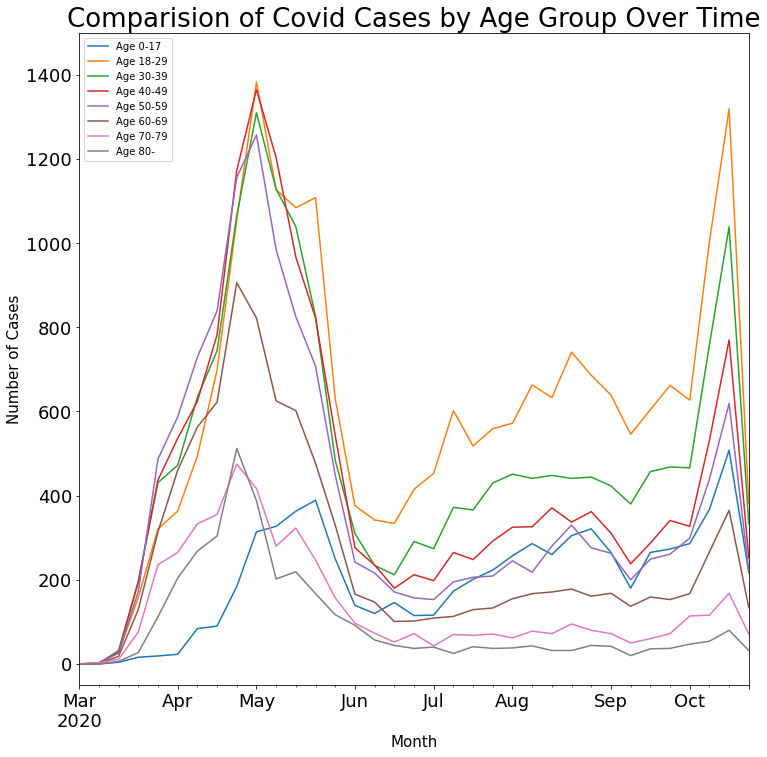

In [27]:
all_age_groups_df.plot(kind="line", figsize=(12,12), fontsize=(18))
plt.title("Comparision of Covid Cases by Age Group Over Time", fontsize=26)
plt.xlabel("Month",fontsize=15)
plt.ylim((-50,1500))
plt.ylabel("Number of Cases", fontsize=15)

Cases by all age groups over time.

In [28]:
ages_18_39_df = cases_df[["cases_age_18_29", "cases_age_30_39"]]
#Clean up column header names for better display
ages_18_39_df = ages_18_39_df.rename(columns = {"cases_age_18_29":"Age 18-29",\
                                    "cases_age_30_39":"Age 30-39"})

Text(0, 0.5, 'Number of Cases')

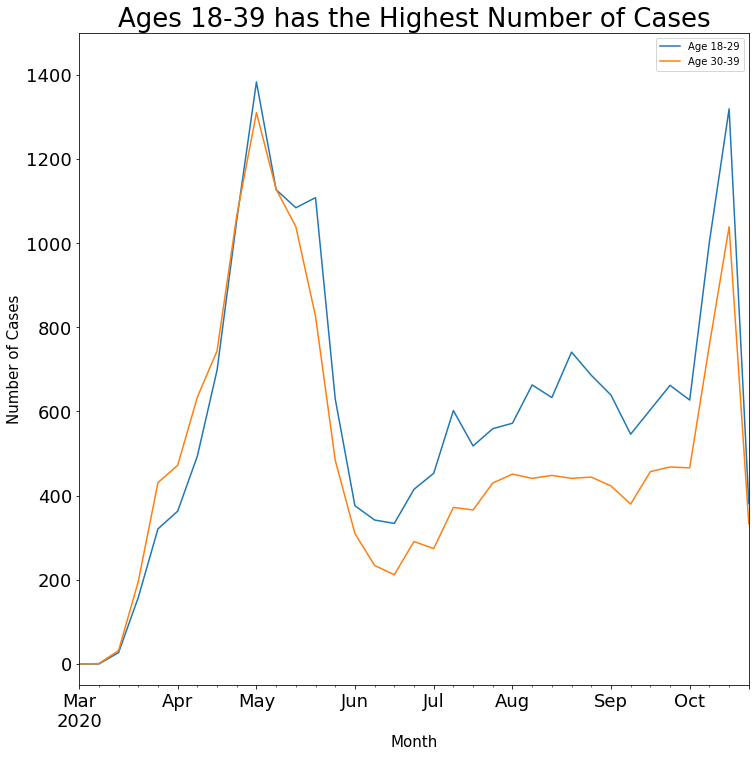

In [29]:
ages_18_39_df.plot(kind="line", figsize=(12,12), fontsize=(18))
plt.title("Ages 18-39 has the Highest Number of Cases", fontsize=26)
plt.xlabel("Month", fontsize=15)
plt.ylim((-50,1500))
plt.ylabel("Number of Cases", fontsize=15)

What Age Group(s) has the highest number of cases?

In [30]:
ages_40_59_df = cases_df[["cases_age_40_49","cases_age_50_59"]]

#Clean up column header names for better display
ages_40_59_df = ages_40_59_df.rename(columns = {"cases_age_40_49":"Age 40-49",\
                                    "cases_age_50_59":"Age 50-59"})

Text(0, 0.5, 'Number of Cases')

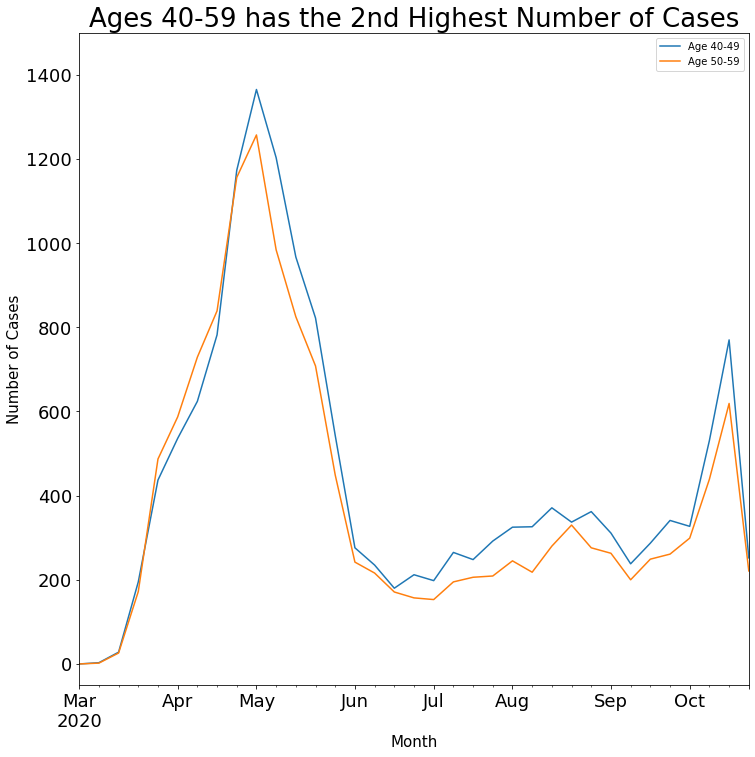

In [31]:
ages_40_59_df.plot(kind="line", figsize=(12,12), fontsize=(18))
plt.title("Ages 40-59 has the 2nd Highest Number of Cases", fontsize=26)
plt.xlabel("Month", fontsize=15)
plt.ylim((-50,1500))
plt.ylabel("Number of Cases",fontsize=15)

#I wanted to print a trend line
# plot the data itself
#ages_40_59_df.plot(x,y,'o')

# calc the trendline
#z = numpy.polyfit(x, y, 1)
#p = numpy.poly1d(z)
#ages_40_59_df.plot(x,p(x),"r--")
# the line equation:
#print "y=%.6fx+(%.6f)"%(z[0],z[1])

What Age Group(s) has the 2nd highest number of cases?

In [32]:
ages_0_17_60_69_df = cases_df[["cases_age_0_17", "cases_age_60_69"]]

#Clean up column header names for better display
ages_0_17_60_69_df = ages_0_17_60_69_df.rename(columns = {"cases_age_0_17":"Age 0-17", "cases_age_60_69":"Age 60-69"})

Text(0, 0.5, 'Number of Cases')

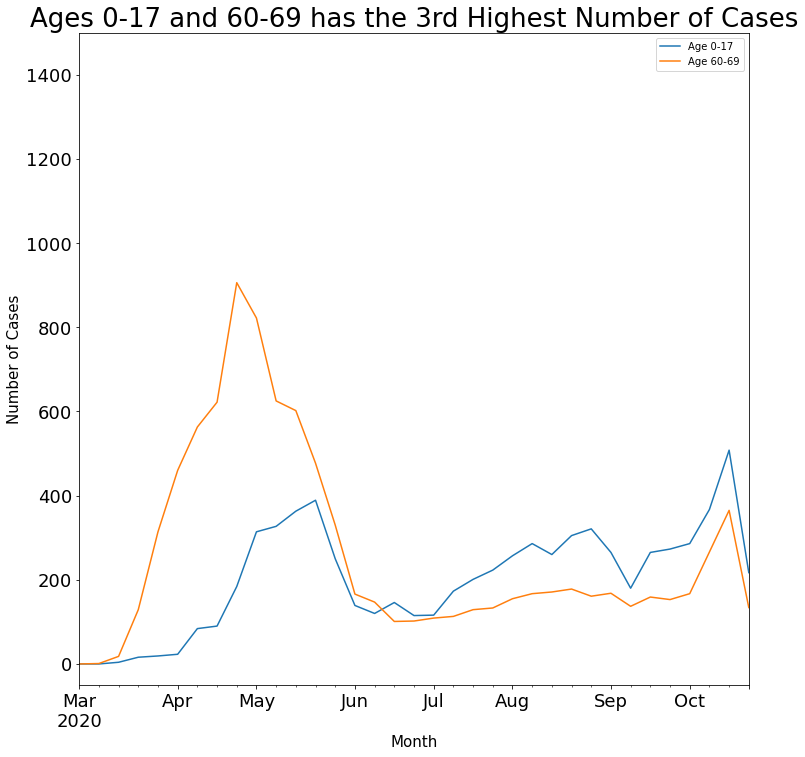

In [33]:
ages_0_17_60_69_df.plot(kind="line", figsize=(12,12), fontsize=(18))
plt.title("Ages 0-17 and 60-69 has the 3rd Highest Number of Cases", fontsize=26)
plt.xlabel("Month", fontsize=15)
plt.ylim((-50,1500))
plt.ylabel("Number of Cases", fontsize=15)

What Age Group(s) has the 3rd highest number of cases?

In [34]:
ages_70_higher_df = cases_df[["cases_age_70_79", "cases_age_80_"]]

#Clean up column header names for better display
ages_70_higher_df = ages_70_higher_df.rename(columns = {"cases_age_70_79":"Age 70-79", "cases_age_80_":"Age 80-"})

Text(0, 0.5, 'Number of Cases')

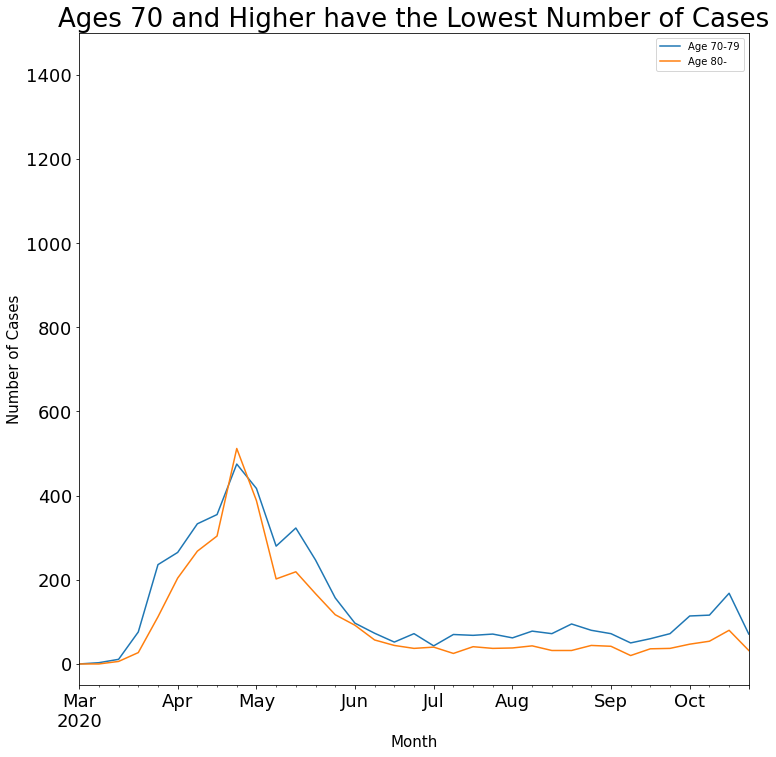

In [35]:
ages_70_higher_df.plot(kind="line", figsize=(12,12), fontsize=(18))
plt.title("Ages 70 and Higher have the Lowest Number of Cases", fontsize=26)
plt.xlabel("Month",fontsize=15)
plt.ylim((-50,1500))
plt.ylabel("Number of Cases", fontsize=15)